# Assignment 1: Submit a write-up on the following:

- Hugging face agents:

**Can do multiple tasks on multiple models and we could compare results easly and pick best model.**
**example: CodeAgent**


- Hugging face pipeline for text generation:

**Piplines are high level helper that simplify the use of HF models. many models have pipelines and one example of a text generation model is: 'HuggingFaceH4/zephyr-7b-beta'**

- HF inference endpoints:

**Inference endpoints are a way to deploy HF models and make them available to users through an API.**



- Give feedback on the image generation and explore different models available on the Hugging Face website

**examples of Generation models in HF: DALL-E, BigGAN,  VQ-VAE-2, StyleGAN2. I didnt have time to try them all but openai model DALL is famously good**







# Assignment 2: Using OpenAI's CLIP Model for Image Captioning and Building an Image Search Engine

# Objective

## In this assignment, you will use OpenAI's CLIP (Contrastive Language-Image Pre-training) model to:
- Generate captions for 15 different images.
- Build a search engine for these images using a larger dataset of images.



## Part 1: Generate Captions for Images


In [19]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [20]:
!pip install rawkit

In [21]:
!pip install sentence_tranformers

ERROR: Could not find a version that satisfies the requirement sentence_tranformers (from versions: none)
ERROR: No matching distribution found for sentence_tranformers


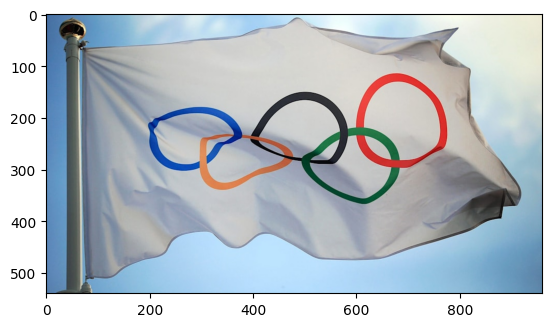

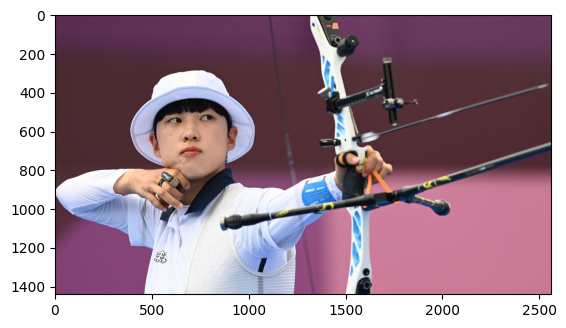

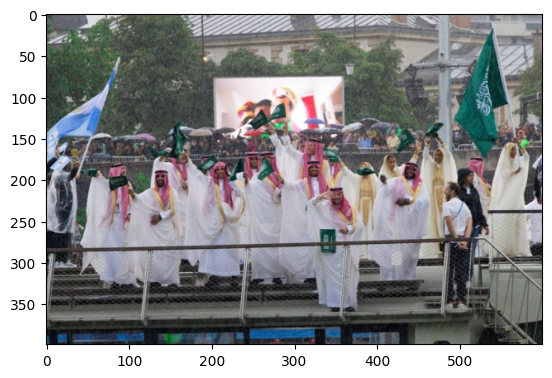

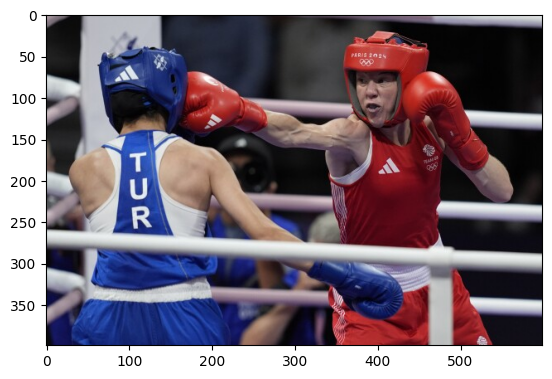

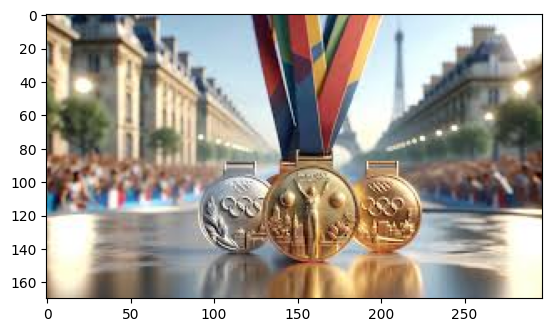

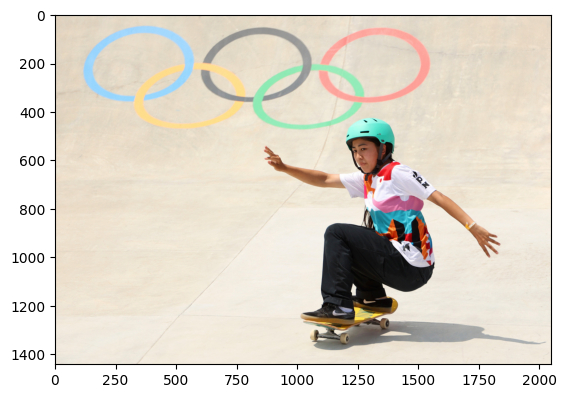

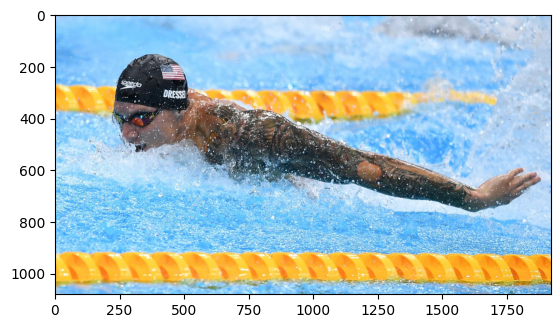

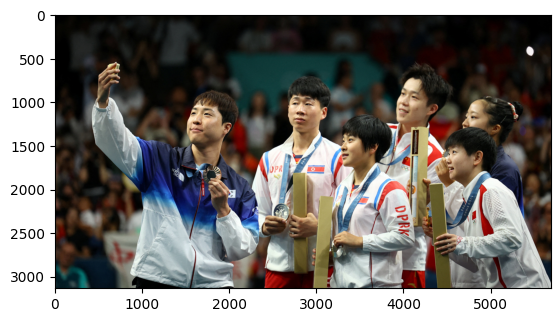

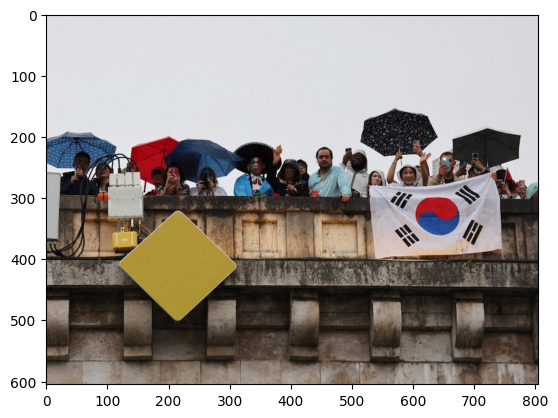

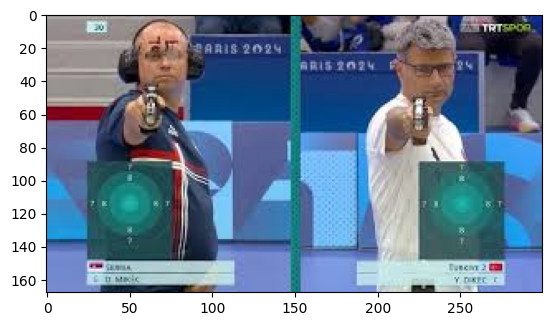

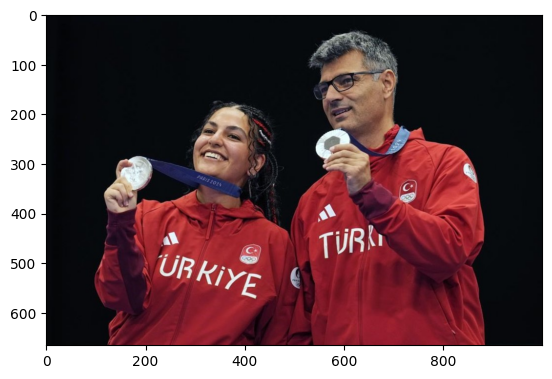

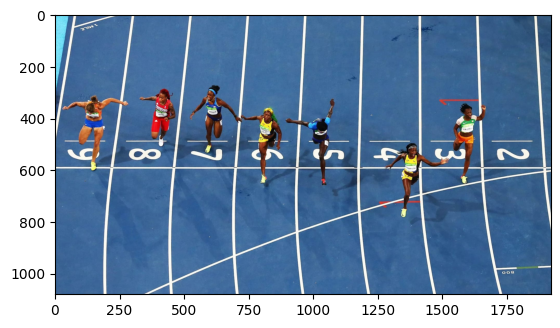

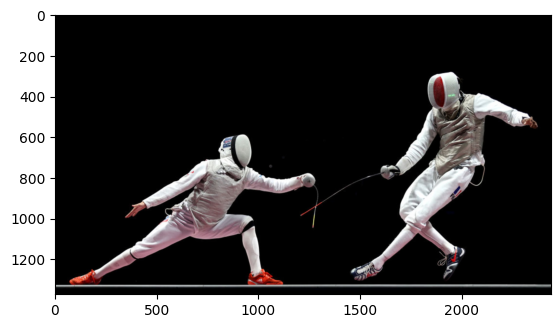

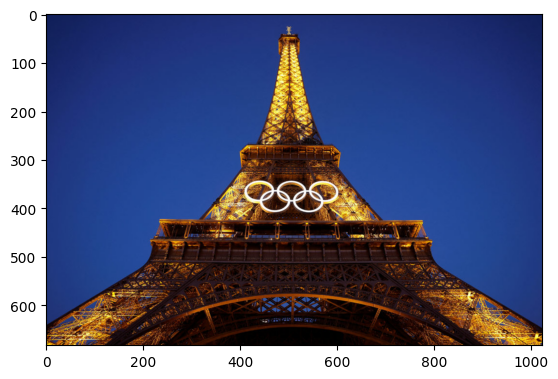

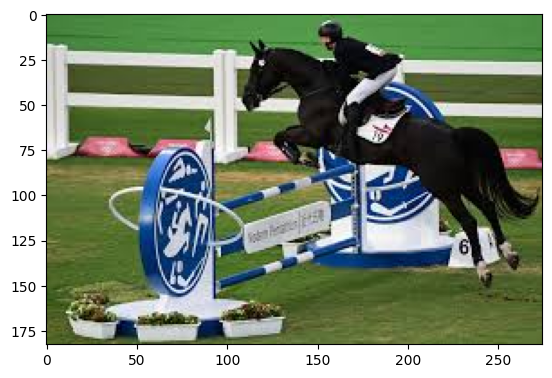

In [22]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import requests

urls = [
    "https://img.olympics.com/images/image/private/t_s_16_9_g_auto/t_s_w960/f_auto/primary/d1fpfljg04lwl1qje9rh",
    "https://assets.teenvogue.com/photos/610410510e7bc6f2029298a3/16:9/w_2560%2Cc_limit/1234305034",
    "https://www.saudigazette.com.sa/uploads/images/2024/07/27/2409460.JPG",
    "https://dims.apnews.com/dims4/default/2376dcc/2147483647/strip/true/crop/3492x2328+0+0/resize/599x399!/quality/90/?url=https%3A%2F%2Fassets.apnews.com%2F%5B-%2F54%2F%2C%20-65%2C%2075%2C%20-123%2C%2091%2C%20121%2C%2030%2C%20-125%2C%20-19%2C%20-115%2C%205%2C%20-79%2C%20-26%2C%2077%2C%207%2C%20-112%2C%20-47%2C%20-17%2C%2046%2C%2043%2C%20-9%2C%2019%2C%20-49%2C%20-78%2C%20-88%2C%20-10%2C%20126%2C%2099%5D%2F008979dfe39f4013badbd93958bfe1df",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQTnEznblJJDRhmnT8DUTnczJsg0gWFAo661w&s",
    "https://cdn.dmcl.biz/media/image/285423/o/Street+skateboarding.jpg",
    "https://cloudfront-us-east-1.images.arcpublishing.com/gmg/7EGMMXS4U5FFHPJP2VSNTGUKDI.jpg",
    "https://static.independent.co.uk/2024/08/01/10/2024-08-01T061051Z_1482521068_UP1EK7U13PW6Q_RTRMADP_3_OLYMPICS-2024-TABLETENNIS.jpg",
    "https://c.ndtvimg.com/2024-07/8isnmhjg_xs_625x300_27_July_24.jpg?im=FaceCrop,algorithm=dnn,width=806,height=605",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ9pMqDJVFcV1ygjTd-iQmrEoJlmqZFHl7ZdQ&s",
    "https://www.winnipegfreepress.com/wp-content/uploads/sites/2/2024/07/2024080106084-66ab5e30ae6ea3a5ed402232jpeg.jpg?w=1000",
    "https://img.olympicchannel.com/images/image/private/t_16-9_1920/f_auto/primary/kc5u8avlnahb6hfojw4c",
    "https://img.olympics.com/images/image/private/t_s_pog_staticContent_hero_xl_2x/f_auto/v1668617476/primary/igr2r1cl1shgna5itint",
    "https://d3i6fh83elv35t.cloudfront.net/static/2024/06/2024-06-07T223309Z_1644992537_UP1EK671M8DWR_RTRMADP_3_OLYMPICS-2024-RINGS-EIFFEL-TOWER-1024x683.jpg",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSfi50pgC3iFnCzfwt9f9PtyIMiZWssz0_iuw&s"]

images = [Image.open(requests.get(url, stream=True).raw) for url in urls]
# images = []
# for url in urls:
#   try:
#     images.append(Image.open(requests.get(url, stream=True).raw))
#   except:
#     print("Failed to load image from URL: ", url)

# let's see what we have
for image in images:
    plt.show(plt.imshow(np.asarray(image)))

In [23]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

captions = []
for image in images:
  caption = pipe(image)[0]['generated_text']
  captions.append(caption)

print(captions)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['the olympic flag flies in the wind', 'a young boy holding a bow and arrow', 'people in white dresses and holding flags are walking across a bridge', 'two boxers in the ring during a boxing match', 'a medal on a table with a crowd in the background', 'a young boy riding a skateboard on a ramp', 'a swimmer in the backstroke', 'a group of people holding up their medals', 'people holding flags and umbrellas on a bridge', 'a video of a man holding a microphone', 'two people holding medals and smiling', 'a group of athletes running on a track', 'two fencing fencers in action', 'the eiff tower', 'a horse jumping over a hurdle']


## Part 2: Build an Image Search Engine


In [24]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

In [25]:
caption = input('What are you searching for?\n')
inputs = processor(
    text=caption, images=images,
    return_tensors='pt', padding=True
)

outputs = model(**inputs)

# probs = outputs.logits_per_image.argmax(dim=1)
# probs

What are you searching for?
two kids


In [26]:
probs = outputs.logits_per_image.argmax()
probs

tensor(10)

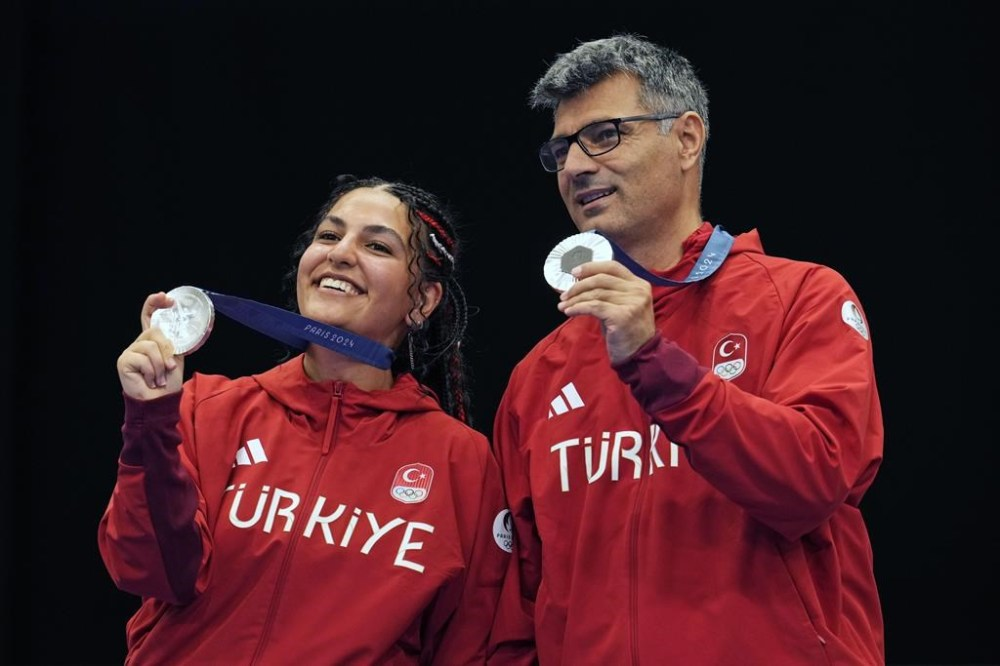

In [27]:
images[probs.item()]